In [29]:
from pathlib import Path
import pandas as pd

def carrega_dades(fitxer):
	return pd.read_csv(Path(fitxer))

In [30]:
df=carrega_dades("tunnel.csv")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          747 non-null    object
 1   NumVehicles  747 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [32]:
df['Data'] = pd.to_datetime(df['Day'])

df=df.set_index('Data')

<Axes: xlabel='Data'>

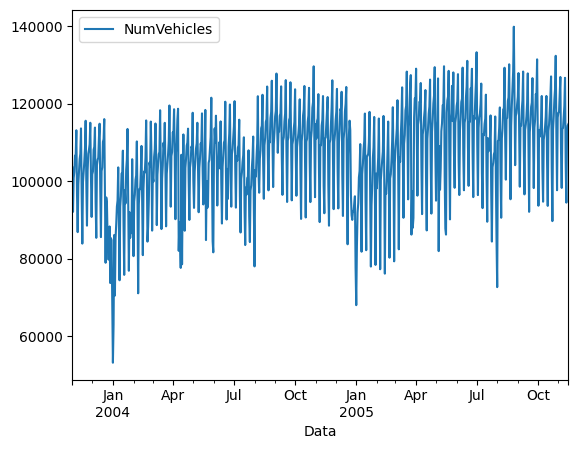

In [33]:
df.plot()

In [40]:
!pip install statsmodels

In [43]:
from statsmodels.tsa.stattools import adfuller

def mostraADF(serie):
    resultat = adfuller(serie);

    # I comprovem aquesta
    print('Estadística ADF: %f' % resultat[0])
    print('Probabilitat (p): %f' % resultat[1])
    print('valors crítics:')
    for key, value in resultat[4].items():
        print('\t%s: %.3f' % (key, value))
        
mostraADF(df["NumVehicles"])      

Estadística ADF: -2.280423
Probabilitat (p): 0.178360
valors crítics:
	1%: -3.439
	5%: -2.866
	10%: -2.569


In [44]:
import numpy as np

df["log_NumVehicles"]=np.log(df["NumVehicles"])

<Axes: xlabel='Data'>

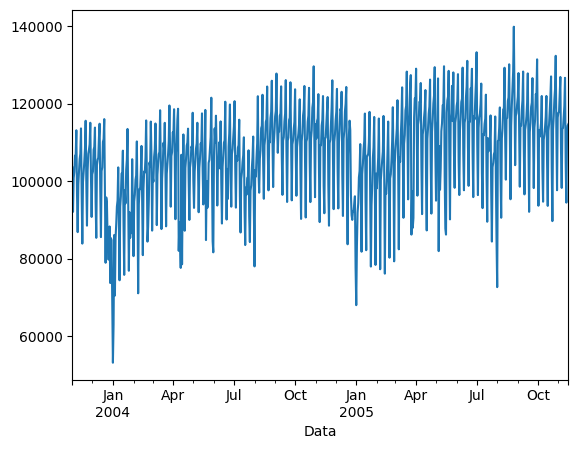

In [45]:
df["NumVehicles"].plot()

In [46]:
mostraADF(df["log_NumVehicles"])

Estadística ADF: -2.404599
Probabilitat (p): 0.140443
valors crítics:
	1%: -3.439
	5%: -2.866
	10%: -2.569


In [47]:
df["dif_NumVehicles"]=df["NumVehicles"].diff()

df=df.dropna()

<Axes: xlabel='Data'>

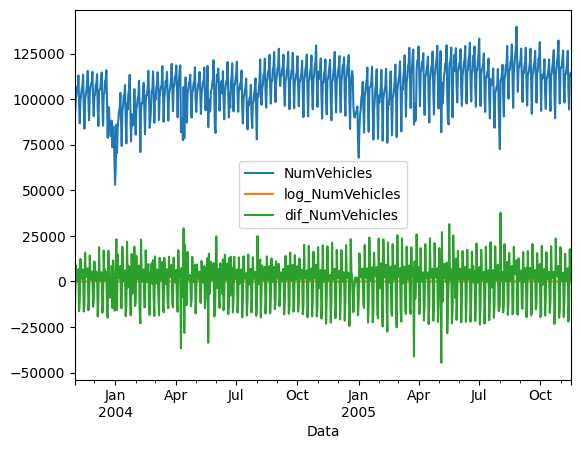

In [48]:
df.plot()

In [49]:
mostraADF(df["dif_NumVehicles"])

Estadística ADF: -8.248457
Probabilitat (p): 0.000000
valors crítics:
	1%: -3.439
	5%: -2.866
	10%: -2.569


In [3]:
df_work=df.copy()

NameError: name 'df' is not defined

In [2]:
for i in range(1,11):
    df_work['Lag_log_' + str(i)] = df_work['log_NumVehicles'].shift(i)
    df_work['Lag_dif_' + str(i)] = df_work['dif_NumVehicles'].shift(i)
    

NameError: name 'df_work' is not defined

In [65]:
df_work=df_work.dropna()

In [66]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 726 entries, 2003-11-22 to 2005-11-16
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Day              726 non-null    object 
 1   NumVehicles      726 non-null    int64  
 2   log_NumVehicles  726 non-null    float64
 3   dif_NumVehicles  726 non-null    float64
 4   Lag_log_1        726 non-null    float64
 5   Lag_dif_1        726 non-null    float64
 6   Lag_log_2        726 non-null    float64
 7   Lag_dif_2        726 non-null    float64
 8   Lag_log_3        726 non-null    float64
 9   Lag_dif_3        726 non-null    float64
 10  Lag_log_4        726 non-null    float64
 11  Lag_dif_4        726 non-null    float64
 12  Lag_log_5        726 non-null    float64
 13  Lag_dif_5        726 non-null    float64
 14  Lag_log_6        726 non-null    float64
 15  Lag_dif_6        726 non-null    float64
 16  Lag_log_7        726 non-null    float64
 1

In [67]:
steps=147
train_set=df_work[:-steps]
test_set=df_work[-steps:]

In [68]:
cols_log=cols =df_work.filter(like='Lag_log_').columns.to_list()
cols_log.append("NumVehicles")
cols_log.append("log_NumVehicles")
cols_log.append("Day")
cols_log.append("dif_NumVehicles")


cols_dif=cols = df_work.filter(like='Lag_dif_').columns.to_list()
cols_log.append("NumVehicles")
cols_log.append("log_NumVehicles")
cols_log.append("Day")
cols_log.append("dif_NumVehicles")

In [ ]:
Y_test=test_set["NumVehicles"].copy()

X_train_log=train_set.drop(cols_dif, axis=1)
Y_train_log=train_set["log_NumVehicles"].copy()

X_test_log=test_set.drop(cols_dif, axis=1)
Y_test_log=test_set["log_NumVehicles"].copy()

X_train_dif=train_set.drop(cols_log, axis=1)
Y_train_dif=train_set["dif_NumVehicles"].copy()

X_test_dif=test_set.drop(cols_log, axis=1)
Y_test_dif=test_set["dif_NumVehicles"].copy()

In [70]:
from sklearn.linear_model import LinearRegression

model_log = LinearRegression()
model_log.fit(X_train_log, Y_train_log)

model_dif = LinearRegression()
model_dif.fit(X_train_dif, Y_train_dif)

ValueError: could not convert string to float: '2003-11-22'

In [71]:
y_pred_log = model_log.predict(X_test_log)

y_pred_dif = model_dif.predict(X_test_dif)

ValueError: could not convert string to float: '2005-06-23'